# Coffee‑Shop Sales × Weather – Analysis & Forecast
Google Colab‑ready notebook

*Upload **sales_weather.csv** to the working directory, then run the cells below.*

In [ ]:
# import pandas as pd, requests
# sales = pd.read_excel('sales.xlsx', header=None, names=['date', 'total_sales'])
# sales['date'] = pd.to_datetime(sales['date'])

# lat, lon = 40.987, 29.045
# start = sales['date'].min().strftime("%Y-%m-%d")
# end   = sales['date'].max().strftime("%Y-%m-%d")

# url = (
#     f'https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}'
#     f'&start_date={start}&end_date={end}'
#     '&daily=temperature_2m_mean,temperature_2m_max,temperature_2m_min,'
#     'precipitation_sum,relative_humidity_2m_mean,wind_speed_10m_max,weathercode'
#     '&timezone=Europe%2FIstanbul'
# )
# weather = pd.DataFrame(requests.get(url, timeout=30).json()['daily'])
# weather.rename(columns={'time':'date',
#                         'temperature_2m_mean':'t_mean',
#                         'temperature_2m_max':'t_max',
#                         'temperature_2m_min':'t_min',
#                         'precipitation_sum':'precip_mm',
#                         'relative_humidity_2m_mean':'rh_mean',
#                         'wind_speed_10m_max':'wind_max'}, inplace=True)
# weather['date'] = pd.to_datetime(weather['date'])
# code_map = {0:'Clear',1:'Mainly clear',2:'Partly cloudy',3:'Overcast',45:'Fog',48:'Fog',
#             51:'Light drizzle',53:'Drizzle',55:'Heavy drizzle',56:'Freezing drizzle light',
#             57:'Freezing drizzle heavy',61:'Light rain',63:'Rain',65:'Heavy rain',
#             66:'Freezing rain light',67:'Freezing rain heavy',71:'Light snow',73:'Snow',
#             75:'Heavy snow',77:'Snow grains',80:'Rain showers',81:'Rain showers',
#             82:'Violent rain showers',85:'Snow showers',86:'Heavy snow showers',
#             95:'Thunderstorm',96:'Thunderstorm + hail',99:'Thunderstorm + heavy hail'}
# weather['condition'] = weather['weathercode'].map(code_map)
# merged = sales.merge(weather, on='date', how='left')
# merged.to_csv('sales_weather.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sales_weather.csv', parse_dates=['date'])
df.sort_values('date', inplace=True)
df.head()

,date,total_sales,t_mean,t_max,t_min,precip_mm,rh_mean,wind_max,weathercode,condition
1,2024-06-07,400.0,24.0,29.3,20.1,0.0,68.0,23.5,3.0,Overcast
2,2024-06-08,477.0,23.4,27.9,19.8,0.0,72.0,25.3,3.0,Overcast
3,2024-06-09,587.0,23.8,29.3,18.9,0.0,69.0,22.7,0.0,Clear
4,2024-06-10,312.0,25.2,32.5,18.1,0.0,64.0,15.5,2.0,Partly cloudy
5,2024-06-11,426.0,28.0,35.1,20.8,0.0,54.0,13.0,3.0,Overcast


Date span : 2024-06-07 00:00:00 → 2025-04-23 00:00:00
Rows      : 322


,count,mean,std,min,25%,50%,75%,max,missing
total_sales,321.0,491.261682,100.613369,283.0,423.0,482.0,552.0,812.0,1
t_mean,321.0,15.557009,7.852031,-2.2,8.9,13.7,23.8,29.0,1
t_max,321.0,19.750467,8.707770,1.5,12.5,18.9,28.2,35.1,1
t_min,321.0,12.111215,7.269723,-5.5,5.8,10.6,19.5,25.3,1
precip_mm,321.0,2.009969,4.976422,0.0,0.0,0.0,1.6,38.7,1
rh_mean,321.0,74.221184,9.424253,39.0,68.0,74.0,81.0,95.0,1
wind_max,321.0,19.196885,6.485531,5.2,14.4,19.1,23.8,38.0,1
weathercode,321.0,28.517134,27.567766,0.0,3.0,3.0,53.0,75.0,1


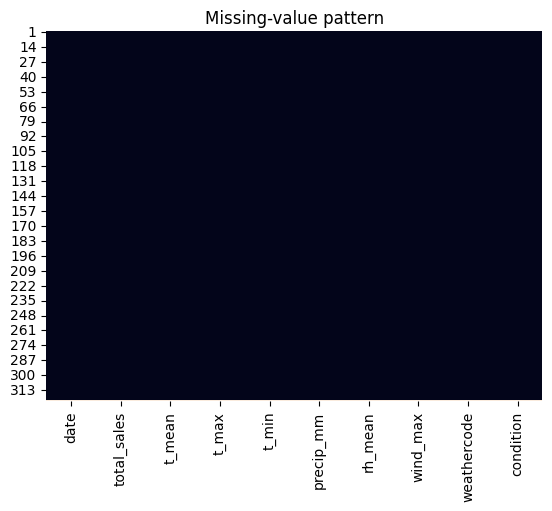

In [ ]:
# dataset overview
print('Date span :', df['date'].min(), '→', df['date'].max())
print('Rows      :', len(df))

# numeric-only summary
num_cols = df.select_dtypes(include='number').columns
summary = df[num_cols].describe().T
summary['missing'] = df[num_cols].isna().sum()
display(summary)

# missing-value heat-map
sns.heatmap(df.isna(), cbar=False)
plt.title('Missing-value pattern')
plt.show()


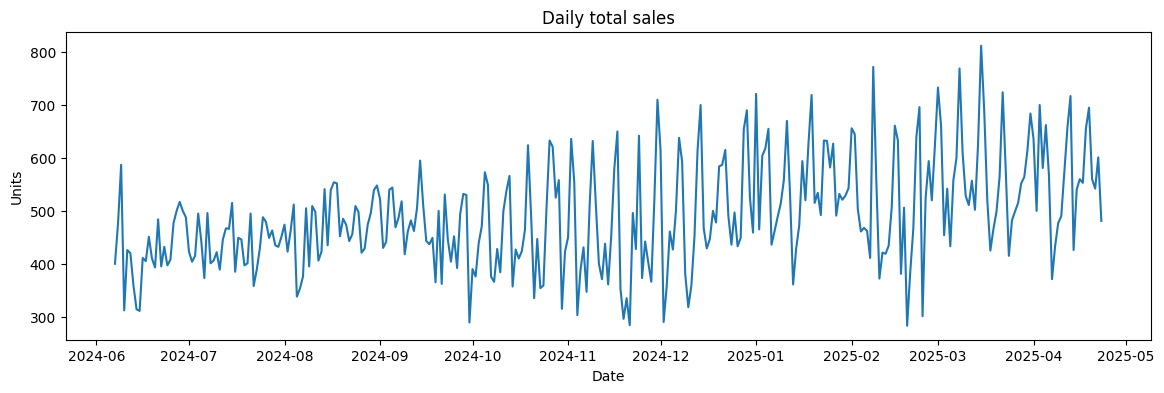

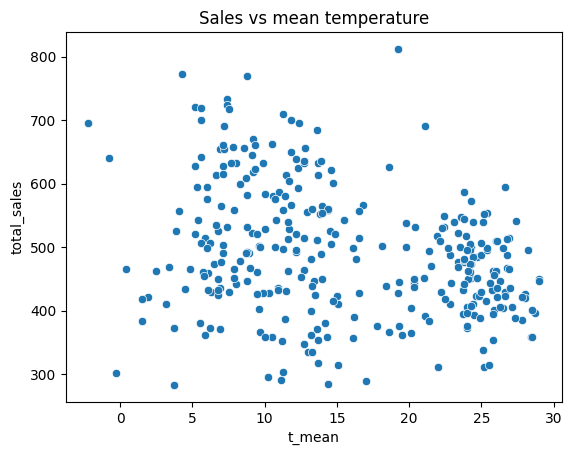

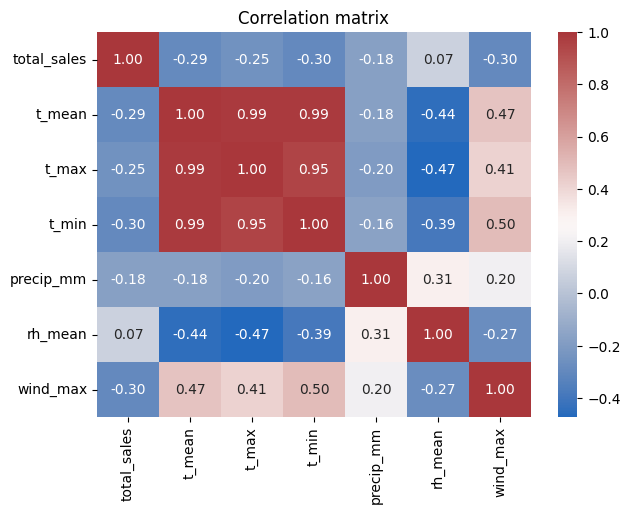

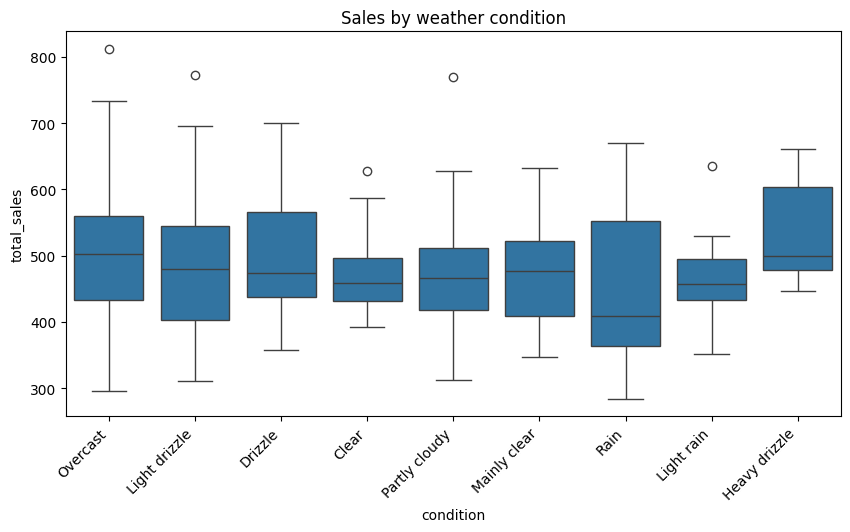

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(df['date'], df['total_sales'])
plt.title('Daily total sales')
plt.xlabel('Date')
plt.ylabel('Units')
plt.show()

sns.scatterplot(x='t_mean', y='total_sales', data=df)
plt.title('Sales vs mean temperature')
plt.show()

num_cols = ['total_sales','t_mean','t_max','t_min','precip_mm','rh_mean','wind_max']
plt.figure(figsize=(7,5))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation matrix')
plt.show()

order = (df['condition'].value_counts().loc[lambda s: s>=10]).index
plt.figure(figsize=(10,5))
sns.boxplot(x='condition', y='total_sales', data=df[df['condition'].isin(order)],
            order=order)
plt.xticks(rotation=45, ha='right')
plt.title('Sales by weather condition')
plt.show()

In [ ]:
numeric_feats = ['t_mean', 't_max', 't_min',
                 'precip_mm', 'rh_mean', 'wind_max']

data = df[df['total_sales'].notna()].copy().reset_index(drop=True)

data[numeric_feats] = data[numeric_feats].apply(lambda s: s.fillna(s.median()))

data['condition'] = data['condition'].fillna('Unknown')
X_cat = pd.get_dummies(data['condition'], prefix='cond')

X = pd.concat([data[numeric_feats], X_cat], axis=1)
y = data['total_sales']

split_idx        = int(len(data) * 0.8)
X_train, X_test  = X.iloc[:split_idx].copy(),  X.iloc[split_idx:].copy()
y_train, y_test  = y.iloc[:split_idx].copy(),  y.iloc[split_idx:].copy()

for _X in (X_train, X_test):
    _X.fillna(_X.median(), inplace=True)
    _X.fillna(0, inplace=True)

print("Train rows:", len(X_train), "| Test rows:", len(X_test))
print("NaNs in X_train?", X_train.isna().any().any(),
      "| NaNs in y_train?", y_train.isna().any())
print("NaNs in X_test? ", X_test.isna().any().any(),
      "| NaNs in y_test? ", y_test.isna().any())

Train rows: 256 | Test rows: 65
NaNs in X_train? False | NaNs in y_train? False
NaNs in X_test?  False | NaNs in y_test?  False


In [ ]:
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

linreg = LinearRegression().fit(X_train, y_train)
rf     = RandomForestRegressor(n_estimators=300, random_state=42).fit(X_train, y_train)

def evaluate(model, name):
    pred  = model.predict(X_test)
    mae   = mean_absolute_error(y_test, pred)
    rmse  = sqrt(mean_squared_error(y_test, pred))
    print(f"{name:<15}  MAE = {mae:.1f}   RMSE = {rmse:.1f}")
    return pred

pred_lin = evaluate(linreg, "LinearRegression")
pred_rf  = evaluate(rf,     "RandomForest")


LinearRegression  MAE = 101.4   RMSE = 127.6
RandomForest     MAE = 112.2   RMSE = 134.4


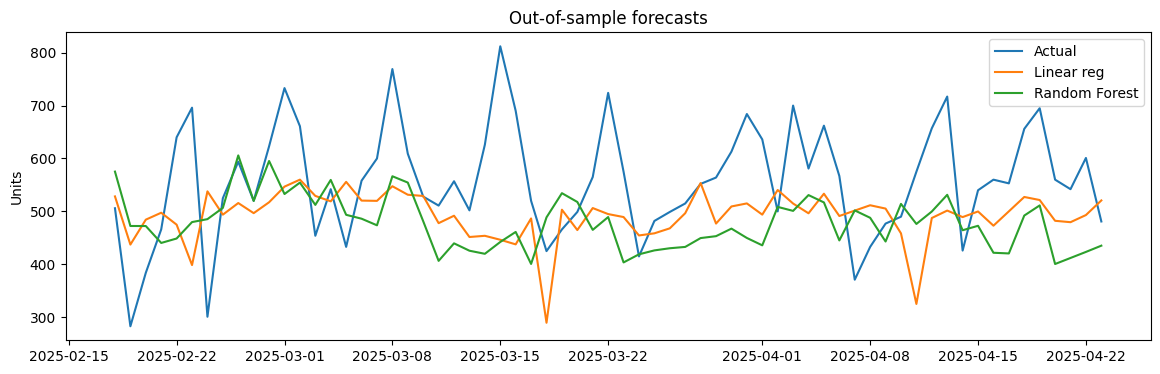

In [ ]:
dates_test = data['date'].iloc[split_idx:]

plt.figure(figsize=(14,4))
plt.plot(dates_test, y_test.values, label='Actual')
plt.plot(dates_test, pred_lin,   label='Linear reg')
plt.plot(dates_test, pred_rf,    label='Random Forest')
plt.legend()
plt.title('Out-of-sample forecasts')
plt.ylabel('Units')
plt.show()


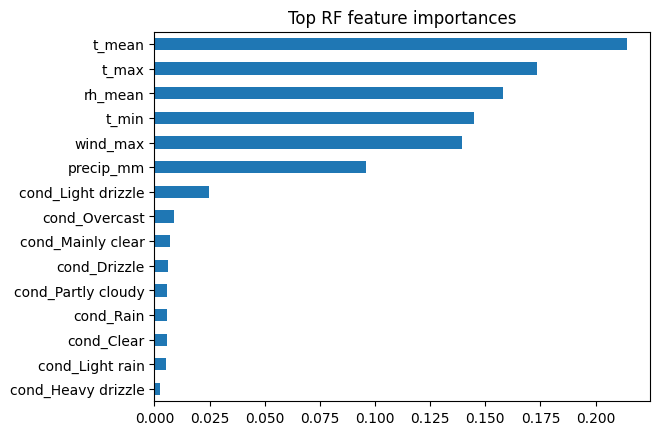

In [ ]:
importances = (pd.Series(rf.feature_importances_, index=X.columns)
                 .sort_values(ascending=False).head(15))
importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top RF feature importances')
plt.show()

In [ ]:
full_rf = RandomForestRegressor(n_estimators=300, random_state=42).fit(X, y)

def forecast_next_day(t_mean, t_max, t_min, precip_mm, rh_mean, wind_max, condition):
    base = pd.DataFrame([[t_mean, t_max, t_min, precip_mm, rh_mean, wind_max]],
                        columns=numeric_feats)
    cond_oh = pd.DataFrame(np.zeros((1, X_cat.shape[1])), columns=X_cat.columns, dtype=int)
    col = f'cond_{condition}'
    if col in cond_oh.columns: cond_oh.loc[0, col] = 1
    features = pd.concat([base, cond_oh], axis=1)
    return float(full_rf.predict(features)[0])

# Example
forecast_next_day(18, 22, 14, 2.5, 65, 18, 'Partly cloudy')

453.7